___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import tensorflow as tf
import os

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))
strategy = tf.distribute.TPUStrategy(resolver)

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Data Wrangling

In [3]:
df = pd.read_csv("/content/drive/MyDrive/NLP/Womens Clothing E-Commerce Reviews.csv")
df.sample(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
16041,16041,1056,46,So comfortable!,I have always been a pilcro fan and these are ...,5,1,3,General,Bottoms,Pants
210,210,895,54,Comfort & style,I have already worn this several times. it is ...,5,1,0,General,Tops,Fine gauge
21223,21223,854,55,Beauty and the beast,I love the designs of tiny blouses. but i wish...,3,0,2,General Petite,Tops,Knits
6665,6665,907,35,"Short, but still cute","Like the other reviewers, i agree that this sw...",3,1,0,General,Tops,Fine gauge
19845,19845,829,26,Black and white shirt,This shirt is even prettier in person. it's re...,5,1,0,General,Tops,Blouses


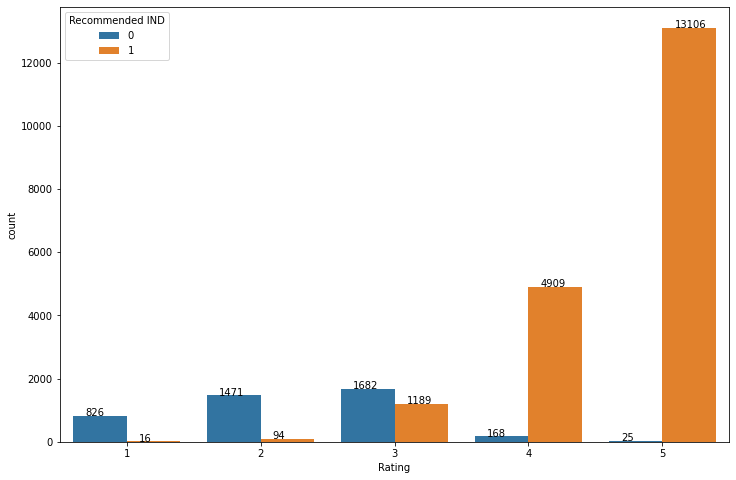

In [18]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for i in ax.patches:
  ax.annotate('{}'.format(i.get_height()), (i.get_x()+0.09, i.get_height()+0.9));

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

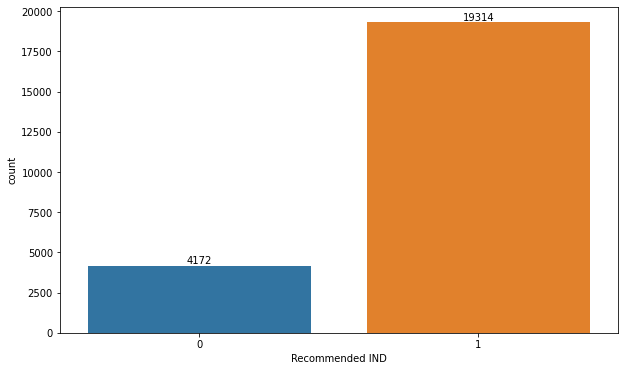

In [20]:
plt.fig = plt.figure(figsize = (10,6))
ax = sns.countplot(x="Recommended IND", data=df)
ax.bar_label(ax.containers[0]);

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [21]:
df.rename(columns={"Review Text":"text", "Recommended IND":"label"}, inplace=True)

In [23]:
df=df[['text','label']]
df.sample(5)

,text,label
14413,I wore this sailboat dress with blue wedges to...,1
13867,I was a bit unsure when ordering because of th...,1
20035,It's true to size but as an fyi for fellow pil...,1
5362,I've been moving toward a simple tee and jean ...,1
14549,I love this top. other reviewers have mentione...,1


---
---


### Missing Value Detection

In [24]:
df.isnull().sum()

text     845
label      0
dtype: int64

In [25]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
22636,I was very happy to snag this dress at such a ...,1
22637,"It reminds me of maternity clothes. soft, stre...",1
22638,"This fit well, but the top was very see throug...",0
22639,I bought this dress for a wedding i have this ...,1


In [26]:
df.isnull().sum()

text     0
label    0
dtype: int64

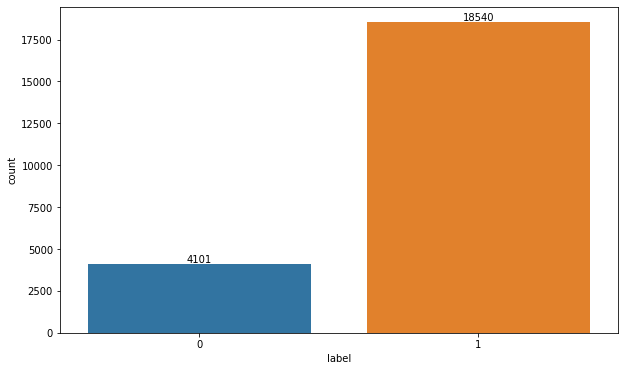

In [27]:
plt.fig = plt.figure(figsize = (10,6))
ax = sns.countplot(x="label", data=df)
ax.bar_label(ax.containers[0]);

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [28]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
stop_words = stopwords.words('english')

In [32]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower()) 
    
    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [35]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [36]:
positive_sentences = df[df["label"] == 1]["text"]
positive_sentences = positive_sentences.apply(cleaning)
positive_sentences

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
22635    wasnt sure ordering skirt couldnt see person f...
22636    happy snag dress great price easy slip flatter...
22637    reminds maternity clothes soft stretchy shiny ...
22639    bought dress wedding summer cute unfortunately...
22640    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 18540, dtype: object

In [37]:
negative_sentences = df[df["label"] == 0]["text"]
negative_sentences = negative_sentences.apply(cleaning)
negative_sentences

2        high hope dress really wanted work initially o...
5        love tracy reese dress one petite foot tall us...
10       dress run small esp zipper area run ordered sp...
22       first pullover styling side zipper wouldnt pur...
25       loved material didnt really look long dress pu...
                               ...                        
22606    tried color really pretty fun donset want pair...
22607    wanted love jacket soft great color unfortunat...
22617    purchased good price typically love maeve fabr...
22634    surprised positive review product terrible cut...
22638    fit well top see never would worked im glad ab...
Name: text, Length: 4101, dtype: object

### Collect Words (positive and negative separately)

In [38]:
positive_words = " ".join(positive_sentences)
positive_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

In [39]:
negative_words = " ".join(negative_sentences)
negative_words[:100]

'high hope dress really wanted work initially ordered petite small usual size found outrageously smal'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [40]:
from wordcloud import WordCloud

In [41]:
wordcloud_positive = WordCloud(background_color="white", max_words =250)

In [42]:
wordcloud_positive.generate(positive_words)

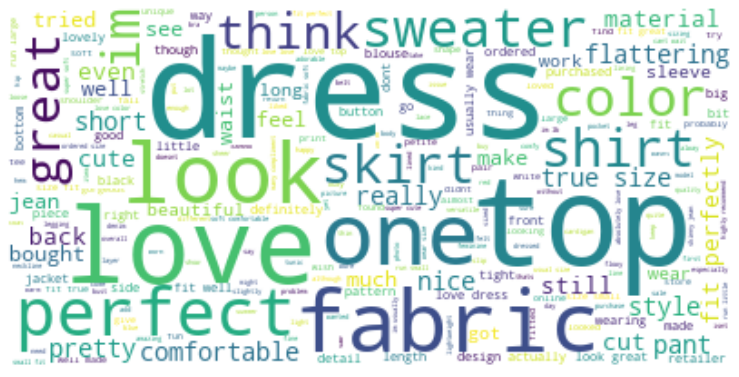

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear",) # interpolation=colour
plt.axis("off")
plt.show()

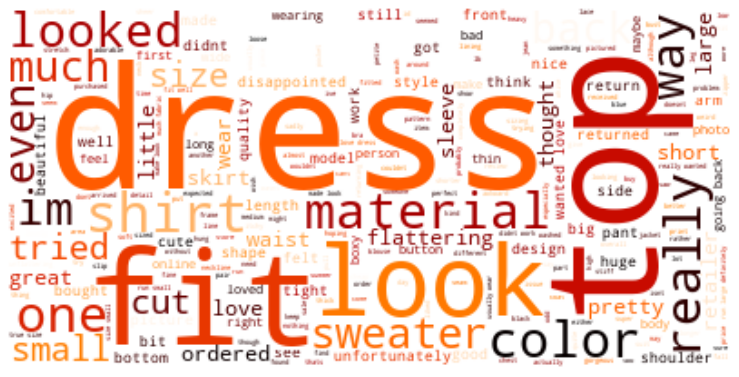

In [44]:
wordcloud_negative = WordCloud(background_color="white", max_words=250, colormap='gist_heat')

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df["text"].values
y = df["label"].map({0:1, 1:0}).values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) 
X_train_count = vectorizer.fit_transform(X_train) 
X_test_count = vectorizer.transform(X_test)

In [ ]:
X_train_count.toarray()

### TF-IDF

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [52]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Logistic Regression

In [53]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [54]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train)) 

### CountVectorizer

In [55]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [56]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[3142  567]
 [ 146  674]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      3709
           1       0.54      0.82      0.65       820

    accuracy                           0.84      4529
   macro avg       0.75      0.83      0.78      4529
weighted avg       0.88      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     14831
           1       0.57      0.88      0.69      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



In [57]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-1': make_scorer(precision_score, pos_label=1),
            'recall-1': make_scorer(recall_score, pos_label=1),
            'f1-1': make_scorer(f1_score, pos_label=1)}

model = LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.846898
test_precision-1    0.551063
test_recall-1       0.840598
test_f1-1           0.665601
dtype: float64

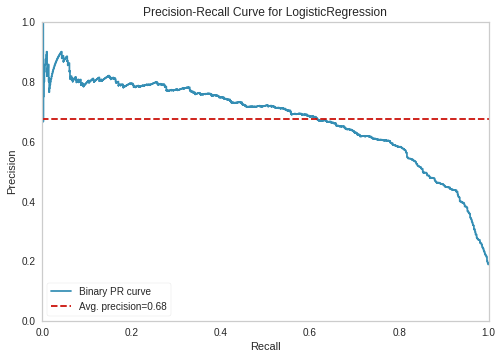

In [58]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [59]:
y_pred = log.predict(X_test_count)
log_AP_count = viz.score_ # 0.76 (avg precision)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [60]:
log = LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [61]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[3126  583]
 [ 129  691]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3709
           1       0.54      0.84      0.66       820

    accuracy                           0.84      4529
   macro avg       0.75      0.84      0.78      4529
weighted avg       0.88      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     14831
           1       0.56      0.88      0.69      3281

    accuracy                           0.85     18112
   macro avg       0.77      0.86      0.79     18112
weighted avg       0.90      0.85      0.86     18112



In [62]:
model = LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.843695
test_precision-1    0.543669
test_recall-1       0.855830
test_f1-1           0.664865
dtype: float64

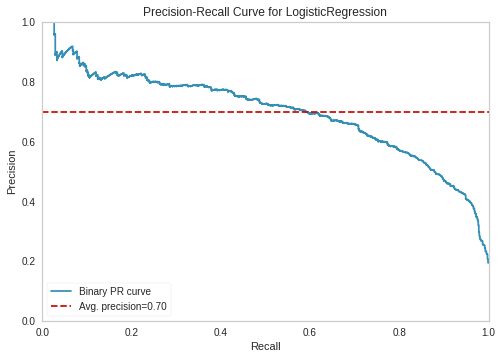

In [63]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced"),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [64]:
y_pred = log.predict(X_test_tf_idf)
log_AP_tfidf = viz.score_
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes 

### Countvectorizer

In [65]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=0.7)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=0.7)

In [66]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[3380  329]
 [ 217  603]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3709
           1       0.65      0.74      0.69       820

    accuracy                           0.88      4529
   macro avg       0.79      0.82      0.81      4529
weighted avg       0.89      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     14831
           1       0.70      0.83      0.76      3281

    accuracy                           0.90     18112
   macro avg       0.83      0.88      0.85     18112
weighted avg       0.91      0.90      0.91     18112



In [67]:
model = MultinomialNB(alpha=0.7)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.882564
test_precision-1    0.649743
test_recall-1       0.763177
test_f1-1           0.701849
dtype: float64

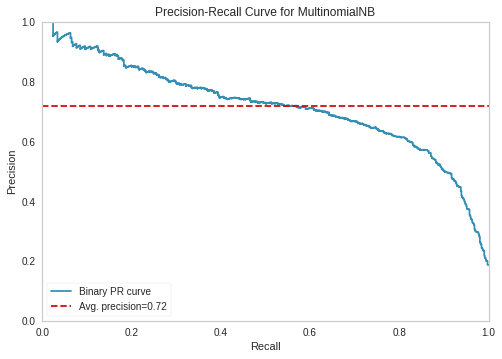

In [68]:
viz = PrecisionRecallCurve(
    MultinomialNB(alpha=0.7),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [69]:
y_pred = nb.predict(X_test_count)
nb_AP_count = viz.score_
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [70]:
nb = BernoulliNB(alpha=0.6)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.6)

In [71]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3374  335]
 [ 215  605]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3709
           1       0.64      0.74      0.69       820

    accuracy                           0.88      4529
   macro avg       0.79      0.82      0.81      4529
weighted avg       0.89      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     14831
           1       0.69      0.81      0.75      3281

    accuracy                           0.90     18112
   macro avg       0.83      0.87      0.84     18112
weighted avg       0.91      0.90      0.90     18112



In [72]:
model = BernoulliNB(alpha=0.6)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.880907
test_precision-1    0.647540
test_recall-1       0.752206
test_f1-1           0.695874
dtype: float64

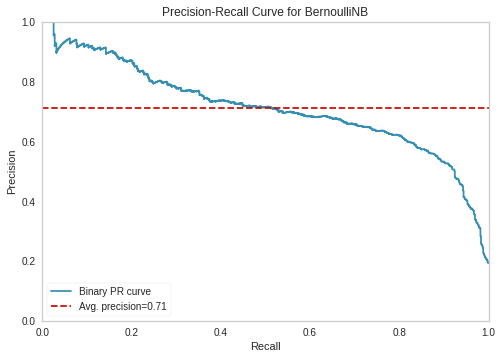

In [73]:
viz = PrecisionRecallCurve(
    BernoulliNB(alpha=0.6),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [74]:
y_pred = nb.predict(X_test_tf_idf)
nb_AP_tfidf = viz.score_
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [75]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.001, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [76]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[3145  564]
 [ 143  677]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      3709
           1       0.55      0.83      0.66       820

    accuracy                           0.84      4529
   macro avg       0.75      0.84      0.78      4529
weighted avg       0.88      0.84      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     14831
           1       0.57      0.88      0.70      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



In [77]:
model = LinearSVC(C=0.001, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.847063
test_precision-1    0.551164
test_recall-1       0.844256
test_f1-1           0.666815
dtype: float64

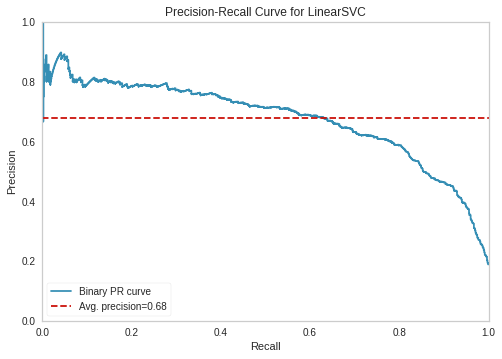

In [78]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.001, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [79]:
y_pred = svc.predict(X_test_count)
svc_AP_count = viz.score_
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [80]:
svc = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [81]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3173  536]
 [ 129  691]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3709
           1       0.56      0.84      0.68       820

    accuracy                           0.85      4529
   macro avg       0.76      0.85      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     14831
           1       0.60      0.91      0.72      3281

    accuracy                           0.87     18112
   macro avg       0.79      0.89      0.82     18112
weighted avg       0.91      0.87      0.88     18112



In [82]:
model = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.857829
test_precision-1    0.571617
test_recall-1       0.860405
test_f1-1           0.686803
dtype: float64

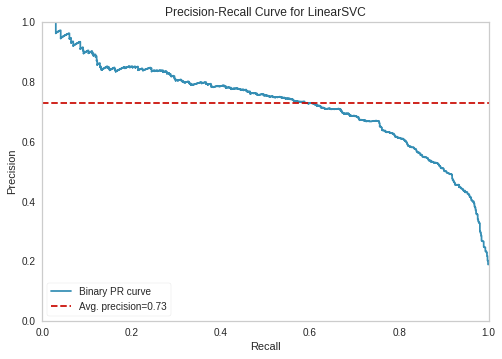

In [83]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.03, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [84]:
y_pred = svc.predict(X_test_tf_idf)
svc_AP_tfidf = viz.score_
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [86]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[3158  551]
 [ 179  641]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3709
           1       0.54      0.78      0.64       820

    accuracy                           0.84      4529
   macro avg       0.74      0.82      0.77      4529
weighted avg       0.87      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     14831
           1       0.59      0.85      0.70      3281

    accuracy                           0.87     18112
   macro avg       0.78      0.86      0.80     18112
weighted avg       0.90      0.87      0.87     18112



In [87]:
model = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.839333
test_precision-1    0.539053
test_recall-1       0.782683
test_f1-1           0.638325
dtype: float64

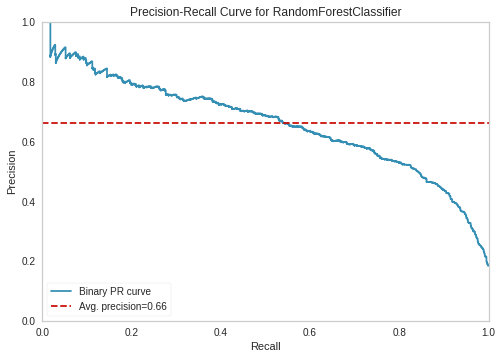

In [88]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [89]:
y_pred = rf.predict(X_test_count)
rf_AP_count = viz.score_
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [90]:
rf = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [91]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[3128  581]
 [ 190  630]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      3709
           1       0.52      0.77      0.62       820

    accuracy                           0.83      4529
   macro avg       0.73      0.81      0.76      4529
weighted avg       0.87      0.83      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.91     14831
           1       0.59      0.87      0.70      3281

    accuracy                           0.87     18112
   macro avg       0.78      0.87      0.81     18112
weighted avg       0.90      0.87      0.88     18112



In [92]:
model = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.832818
test_precision-1    0.526304
test_recall-1       0.778420
test_f1-1           0.627829
dtype: float64

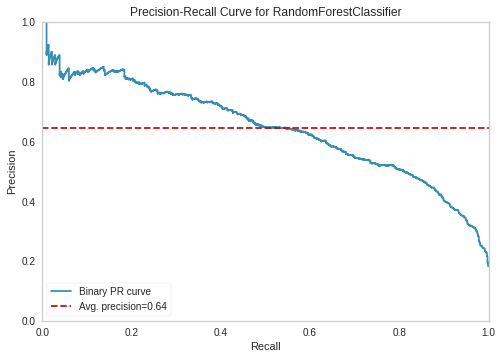

In [93]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [94]:
y_pred = rf.predict(X_test_tf_idf)
rf_AP_tfidf = viz.score_
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [95]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=500, random_state=42)

In [96]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3532  177]
 [ 380  440]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      3709
           1       0.71      0.54      0.61       820

    accuracy                           0.88      4529
   macro avg       0.81      0.74      0.77      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     14831
           1       0.81      0.64      0.71      3281

    accuracy                           0.91     18112
   macro avg       0.87      0.80      0.83     18112
weighted avg       0.90      0.91      0.90     18112



In [97]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.881791
test_precision-1    0.723236
test_recall-1       0.562630
test_f1-1           0.632703
dtype: float64

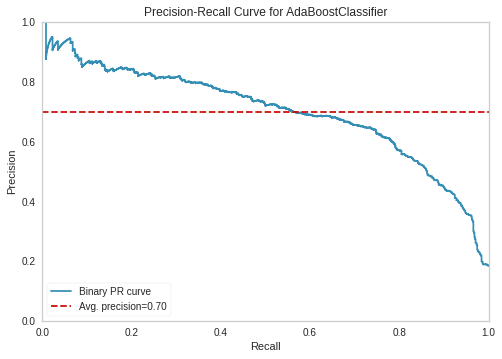

In [98]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [99]:
y_pred = ada.predict(X_test_count)
ada_AP_count = viz.score_
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [100]:
ada = AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=200, random_state=42)

In [101]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3541  168]
 [ 407  413]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3709
           1       0.71      0.50      0.59       820

    accuracy                           0.87      4529
   macro avg       0.80      0.73      0.76      4529
weighted avg       0.86      0.87      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     14831
           1       0.77      0.59      0.67      3281

    accuracy                           0.89     18112
   macro avg       0.84      0.77      0.80     18112
weighted avg       0.89      0.89      0.89     18112



model = AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

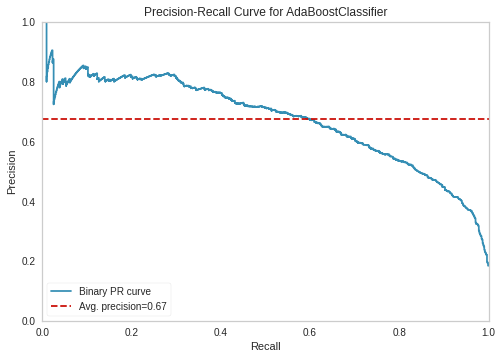

In [103]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [104]:
y_pred = ada.predict(X_test_tf_idf)
ada_AP_tfidf = viz.score_
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## DL modeling

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [107]:
df.shape

(22641, 2)

### Tokenization

In [108]:
num_words = 15000 
tokenizer = Tokenizer(num_words=num_words)


In [109]:
tokenizer.fit_on_texts(X) 

### Creating word index

In [110]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [111]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [112]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [113]:
X[100]

"The fabric felt cheap and i didn't find it to be a flattering top. for reference i am wearing a medium in the photos and my measurements are 38-30-40."

### Maximum number of tokens for all documents¶

In [114]:
print(X_num_tokens[100])

[1, 45, 267, 489, 3, 2, 124, 221, 5, 8, 29, 4, 58, 25, 12, 330, 2, 38, 141, 4, 97, 9, 1, 451, 3, 17, 1506, 27, 920, 691, 927]


In [115]:
len(X_num_tokens[100])

31

In [116]:
len(X_num_tokens[150])

41

In [117]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens) 

In [118]:
num_tokens.mean() 

60.60699615741354

In [119]:
num_tokens.argmax()

16263

In [120]:
X[15213]

'Beautiful dress. lots of compliments. will transition well from summer to fall.'

In [121]:
max_tokens = 116

In [122]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [123]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [124]:
X_pad.shape

(22641, 116)

In [125]:
np.array(X_num_tokens[500])

array([   2,  171,  196,    7,  170,  931,   44,    1,  106,    3,    5,
        124,   48,   23,   69,    2,  196,    5,  498,   11,  158,   16,
          2,  341,    8,  179,    5,   11,   36,   16,  314,    2,  131,
          1,  672,  462,   83,    6,   16,   61,    2,   24,  652,  200,
          3,    7,  170,  131,   19, 8659,   17,  194,   44,   75,    5,
          6,   23,   68,    2,   72,    1, 1207,   46,    3,   15,   23,
        531,   44,  167,  542,    5,   15,    1,  135,   27,    4,  507,
         77,   90,   10,    1,  462, 1524,  420,   89,   60,  601, 1197,
         16,    5,   66,   29, 2309,   43,   19,  224,   49,    1, 5773,
         46, 1126,  166,   35,   46,   37,   49,    1])

In [126]:
X_pad[500]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    2,  171,
        196,    7,  170,  931,   44,    1,  106,    3,    5,  124,   48,
         23,   69,    2,  196,    5,  498,   11,  158,   16,    2,  341,
          8,  179,    5,   11,   36,   16,  314,    2,  131,    1,  672,
        462,   83,    6,   16,   61,    2,   24,  652,  200,    3,    7,
        170,  131,   19, 8659,   17,  194,   44,   75,    5,    6,   23,
         68,    2,   72,    1, 1207,   46,    3,   15,   23,  531,   44,
        167,  542,    5,   15,    1,  135,   27,    4,  507,   77,   90,
         10,    1,  462, 1524,  420,   89,   60,  601, 1197,   16,    5,
         66,   29, 2309,   43,   19,  224,   49,    1, 5773,   46, 1126,
        166,   35,   46,   37,   49,    1], dtype=int32)

In [127]:
np.array(X_num_tokens[15213])

array([ 73,  18, 590,  13, 210,  55, 849,  59, 105, 138,   8, 172])

In [128]:
X_pad[15213]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        73,  18, 590,  13, 210,  55, 849,  59, 105, 138,   8, 172],
      dtype=int32)

### Train Set Split

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=101)

### Modeling

In [131]:
model = Sequential()

In [132]:
embedding_size = 50

In [133]:
model.add(Embedding(input_dim=num_words, 
                    output_dim=embedding_size, 
                    input_length=max_tokens)) 


model.add(GRU(units=48, return_sequences=True))   
#model.add(Dropout(0.5))
#model.add(GRU(units=24, return_sequences=True))
#model.add(Dropout(0.5))
model.add(GRU(units=24))
model.add(Dense(1, activation='sigmoid'))

In [134]:
optimizer = Adam(learning_rate=0.001)

In [135]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [136]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           750000    
                                                                 
 gru (GRU)                   (None, 116, 48)           14400     
                                                                 
 gru_1 (GRU)                 (None, 24)                5328      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 769,753
Trainable params: 769,753
Non-trainable params: 0
_________________________________________________________________


In [137]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           verbose=1, patience = 2, restore_best_weights=True)

In [138]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([2.76022758, 0.61060833])

In [139]:
model.fit(X_train, y_train, epochs=25, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
160/160 [==============================] - 22s 108ms/step - loss: 0.4760 - recall: 0.7291 - val_loss: 0.4643 - val_recall: 0.9341
Epoch 2/25
160/160 [==============================] - 16s 101ms/step - loss: 0.2737 - recall: 0.9163 - val_loss: 0.3041 - val_recall: 0.6561
Epoch 3/25
160/160 [==============================] - 16s 101ms/step - loss: 0.2222 - recall: 0.9426 - val_loss: 0.3269 - val_recall: 0.8561
Epoch 3: early stopping


In [140]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.475967,0.729071,0.464315,0.934146
1,0.273736,0.916283,0.304126,0.656098
2,0.222236,0.942563,0.326887,0.856098


<AxesSubplot:>

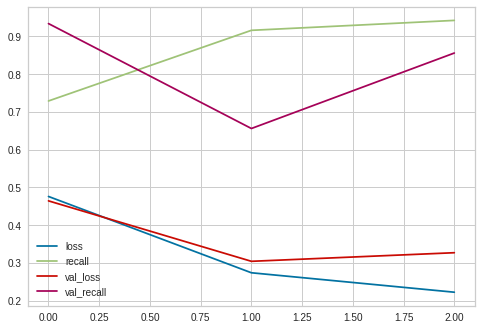

In [141]:
model_loss.plot()
# en iyisi 1 epoch'unda

In [142]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 10s 15ms/step
[[12813  3872]
 [  115  3576]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.77      0.87     16685
           1       0.48      0.97      0.64      3691

    accuracy                           0.80     20376
   macro avg       0.74      0.87      0.75     20376
weighted avg       0.90      0.80      0.82     20376



In [143]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

71/71 [==============================] - 1s 14ms/step
[[1402  453]
 [  27  383]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.76      0.85      1855
           1       0.46      0.93      0.61       410

    accuracy                           0.79      2265
   macro avg       0.72      0.84      0.73      2265
weighted avg       0.89      0.79      0.81      2265



In [144]:
from sklearn.metrics import precision_recall_curve, average_precision_score

71/71 [==============================] - 1s 15ms/step


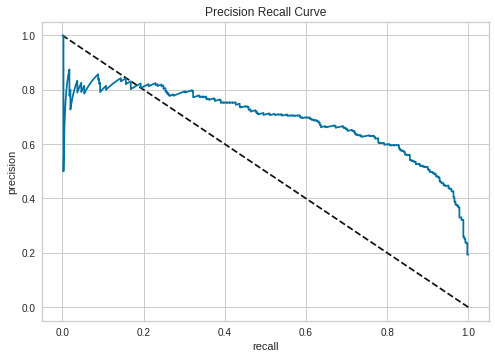

In [145]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.show()

In [146]:
average_precision_score(y_test, y_pred_proba)

0.6929247413071158

In [147]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [148]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 67.9 MB/s eta 0:00:00


In [149]:
import tensorflow as tf
import os

In [150]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [152]:
df = pd.read_csv("/content/drive/MyDrive/NLP/Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Train test split

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

### Tokenization

In [154]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased") 
max_len = 0

# For every sentence...
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    
    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  162


### Fixing token counts of all documents

In [155]:
# For every sentence...
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))

print('Max sentence length: ', max(max_token))

Max sentence length:  162


In [156]:
np.array(max_token).mean()

76.75659202332052

In [157]:
sum(np.array(max_token) <= 162) / len(max_token)

1.0

In [158]:
def transformation(X):
  # set array dimensions
  seq_len = 162

 
  Xids = []
  Xmask = []

    
  for sentence in X:

      tokens = tokenizer.encode_plus(sentence, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
     

      Xids.append(tokens['input_ids']) 
      Xmask.append(tokens['attention_mask'])

  return np.array(Xids), np.array(Xmask)

### Transformation Vectors to Matrices

In [159]:
Xids_train, Xmask_train = transformation(X_train)

Xids_test, Xmask_test = transformation(X_test)

In [160]:
Xids_train

array([[  101, 10140,  3797, ...,     0,     0,     0],
       [  101,  1045,  2245, ...,     0,     0,     0],
       [  101,  1045,  2156, ...,     0,     0,     0],
       ...,
       [  101,  1045,  2001, ...,     0,     0,     0],
       [  101,  2488,  2084, ...,     0,     0,     0],
       [  101,  1045,  2293, ...,     0,     0,     0]])

In [161]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (20376, 162)
Xmask_train.shape : (20376, 162)
Xids_test.shape   : (2265, 162)
Xmask_test.shape  : (2265, 162)


In [162]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [163]:
labels_train = y_train.reshape(-1,1)
labels_train

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [164]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

In [165]:
labels_test = y_test.reshape(-1,1)
labels_test

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [166]:
from tensorflow.keras.utils import to_categorical

l = np.array([0, 1, 3, 5, 4, 2])
to_categorical(l, 6) 

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

### Transformation Matrix to Tensorflow tensor

In [167]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [168]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [169]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [170]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [171]:
dataset_train

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [172]:
dataset_test

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [173]:
batch_size = 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

In [174]:
train_ds

<BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 162), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 162), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

In [175]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.8 MB/s eta 0:00:00


In [176]:
print(len(train_ds)*3)
print(int(0.1*len(train_ds)*3))

1911
191


### Creating optimization

In [177]:
from official.nlp import optimization
epochs = 3
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw') 

### Creating Model

In [178]:
def create_model():
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("bert-base-uncased")
    input_ids = tf.keras.layers.Input(shape=(162,), name='input_ids', dtype='int32') 
    attention_mask = tf.keras.layers.Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] 
                                                                                            
    x = tf.keras.layers.Dense(162, activation='relu')(embeddings)  
    x = tf.keras.layers.Dropout(0.1, name="dropout")(x) 
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)


In [179]:
with strategy.scope(): 
  
  optimizer = optimizer 
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [180]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

### Model Fiting

In [181]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs)

Epoch 1/3
637/637 [==============================] - 229s 185ms/step - loss: 0.2967 - recall: 0.6147 - val_loss: 0.2048 - val_recall: 0.8073
Epoch 2/3
637/637 [==============================] - 68s 106ms/step - loss: 0.1617 - recall: 0.8339 - val_loss: 0.2296 - val_recall: 0.8000
Epoch 3/3
637/637 [==============================] - 67s 105ms/step - loss: 0.1053 - recall: 0.9082 - val_loss: 0.2788 - val_recall: 0.7415


### Model evaluation

In [182]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.296744,0.614739,0.204768,0.807317
1,0.161744,0.833920,0.229599,0.800000
2,0.105307,0.908155,0.278797,0.741463


<AxesSubplot:>

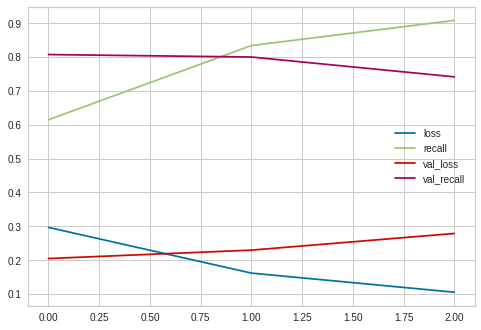

In [183]:
model_loss.plot()

In [184]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5


print(classification_report(y_test, y_pred))

71/71 [==============================] - 12s 96ms/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1855
           1       0.81      0.74      0.78       410

    accuracy                           0.92      2265
   macro avg       0.88      0.85      0.86      2265
weighted avg       0.92      0.92      0.92      2265



In [185]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train, y_train_pred))  

637/637 [==============================] - 22s 33ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16685
           1       0.94      0.95      0.94      3691

    accuracy                           0.98     20376
   macro avg       0.96      0.97      0.97     20376
weighted avg       0.98      0.98      0.98     20376



71/71 [==============================] - 3s 28ms/step


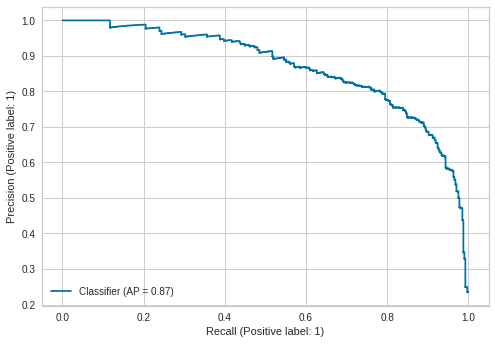

In [186]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show()

In [187]:
pd.Series(y).value_counts(normalize=True)

0    0.818868
1    0.181132
dtype: float64

In [188]:
weights = {0:0.2, 1:0.8}

In [189]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=epochs, class_weight=weights) 

Epoch 1/3
637/637 [==============================] - 167s 170ms/step - loss: 0.0498 - recall: 0.9114 - val_loss: 0.2788 - val_recall: 0.7415
Epoch 2/3
637/637 [==============================] - 67s 106ms/step - loss: 0.0490 - recall: 0.9193 - val_loss: 0.2788 - val_recall: 0.7415
Epoch 3/3
637/637 [==============================] - 67s 106ms/step - loss: 0.0487 - recall: 0.9168 - val_loss: 0.2788 - val_recall: 0.7415


In [190]:
y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]


print(classification_report(y_test, y_pred))

71/71 [==============================] - 3s 27ms/step


Exception ignored in: <function Executor.__del__ at 0x7f56940b9c10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1855
           1       0.81      0.74      0.78       410

    accuracy                           0.92      2265
   macro avg       0.88      0.85      0.86      2265
weighted avg       0.92      0.92      0.92      2265



In [191]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred)) 

637/637 [==============================] - 18s 27ms/step


Exception ignored in: <function Executor.__del__ at 0x7f56940b9c10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16685
           1       0.94      0.95      0.94      3691

    accuracy                           0.98     20376
   macro avg       0.96      0.97      0.97     20376
weighted avg       0.98      0.98      0.98     20376



In [192]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test, y_pred_proba)

71/71 [==============================] - 3s 29ms/step


0.8681684069153883

In [193]:
BERT_without_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test, y_pred)
BERT_without_weighted_rec = recall_score(y_test, y_pred)

In [194]:
BERT_with_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test, y_pred)
BERT_with_weighted_rec = recall_score(y_test, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

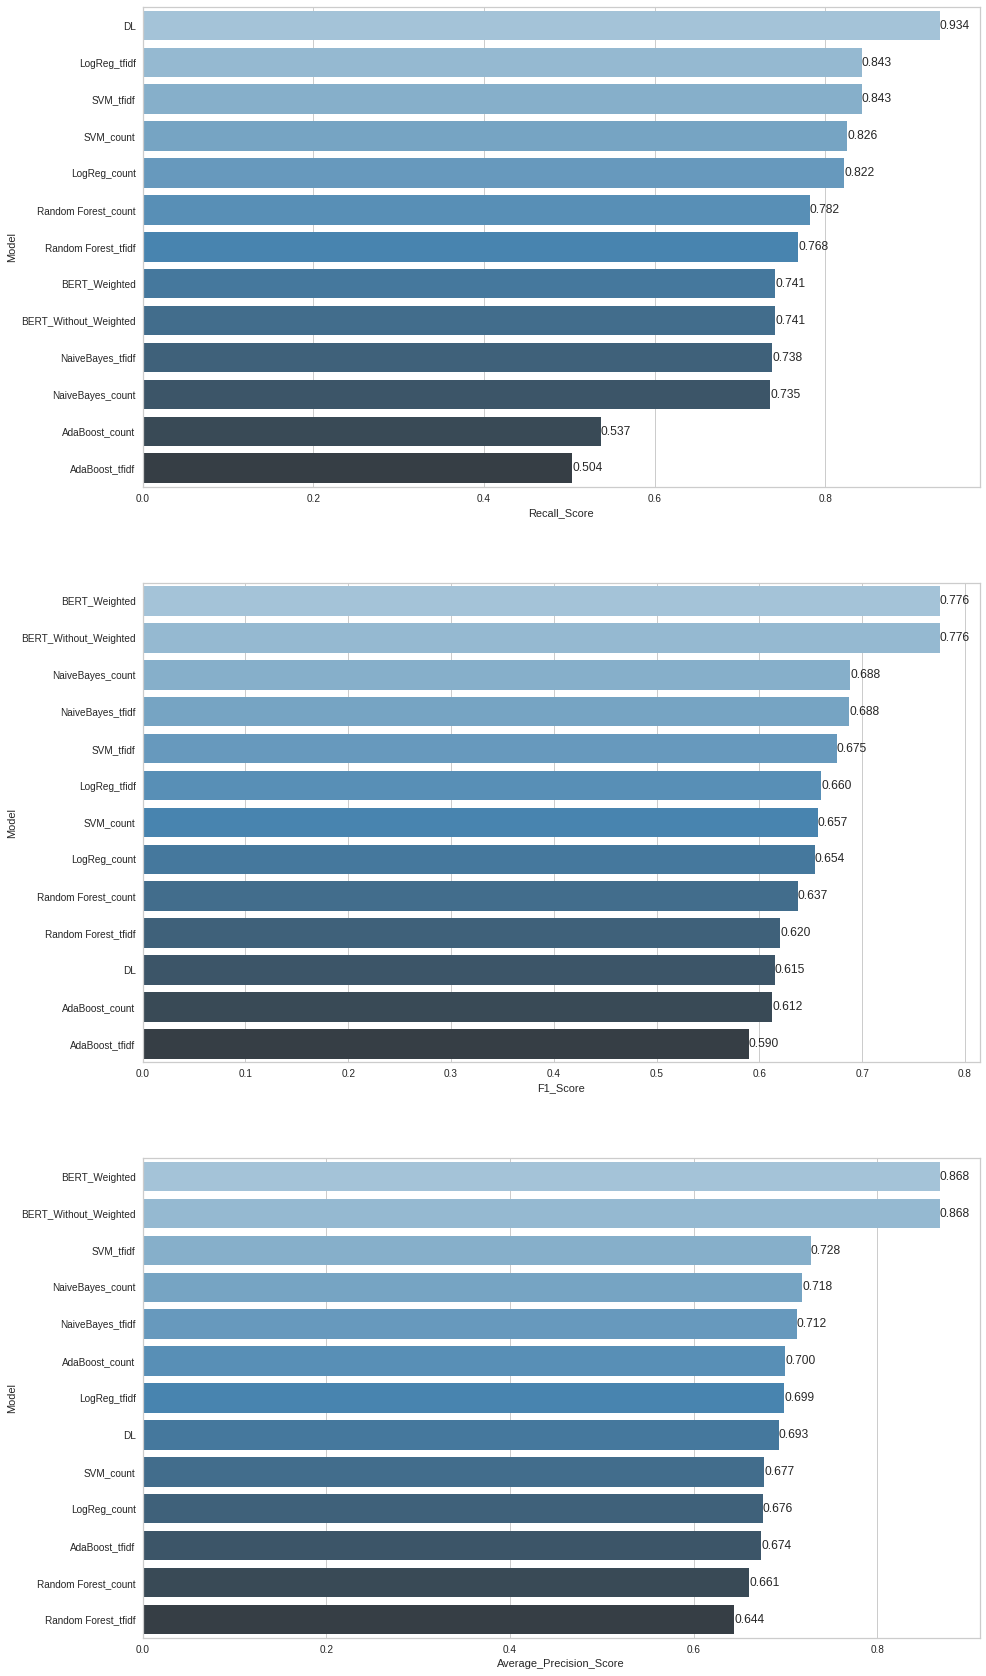

In [195]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted", "BERT_Without_Weighted"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_with_weighted_f1, BERT_without_weighted_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_with_weighted_rec, BERT_without_weighted_rec],
                        
                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_with_weighted_AP, BERT_without_weighted_AP]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___